In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
HOME = '/content/drive/My Drive/Colab Notebooks/hands_on_machine_learning/hands_on_machine_learning'
CWD = os.path.join(HOME, 'artificial_neural_networks/introduction_to_ann_with_keras')

%cd $CWD

/content/drive/My Drive/Colab Notebooks/hands_on_machine_learning/hands_on_machine_learning/artificial_neural_networks/introduction_to_ann_with_keras


## *Wide and Deep* Architecture

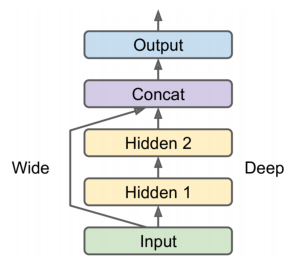

In [3]:
wide_and_deep_img = Image.open('img/wide_and_deep.png')
plt.figure(figsize=(5, 5))
plt.imshow(wide_and_deep_img)
plt.grid(False)
plt.axis('off');

In [0]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
# building ANN model in W&D architecture


# -------- input layer --------
input_layer = keras.Input(shape=X_train.shape[1:])

# -------- deep layers --------
hidden_0 = keras.layers.Dense(30, activation='relu')(input_layer)
hidden_1 = keras.layers.Dense(30, activation='relu')(hidden_0)

# -------- concatination layer --------
concat = keras.layers.Concatenate()([input_layer, hidden_1])

# -------- output layer --------
output_layer = keras.layers.Dense(1)(concat)

# -------- model building --------
model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

In [7]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)
loss = model.evaluate(X_test, y_test)

print()

print(' STATS '.center(32, '='))
print(f'loss: {loss}')
print(''.center(32, '='))

Epoch 1/5
363/363 [==============================] - 1s 4ms/step - loss: 1.2608 - val_loss: 3.3923
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6580 - val_loss: 0.9356
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5647
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5585 - val_loss: 0.5710
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.5216

============ STATS =============
loss: 0.5215688347816467


### Dividing input into two subsets

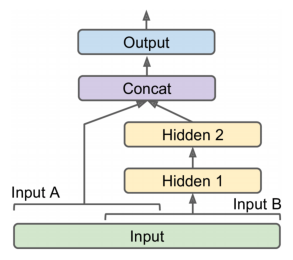

In [8]:
input_subsets_img = Image.open('img/input_subsets.png')
plt.figure(figsize=(5, 5))
plt.imshow(input_subsets_img)
plt.grid(False)
plt.axis('off');

In [0]:
# -------- input layer --------
input_layer_A = keras.Input(shape=[5])
input_layer_B = keras.Input(shape=[6])

# -------- deep layers --------
hidden_0 = keras.layers.Dense(30, activation='relu')(input_layer_B)
hidden_1 = keras.layers.Dense(30, activation='relu')(hidden_0)

# -------- concatination layer --------
concat = keras.layers.concatenate([input_layer_A, hidden_1])

# -------- output layer --------
output_layer = keras.layers.Dense(1, name="output")(concat)

# -------- model building --------
model = keras.models.Model(inputs=[input_layer_A, input_layer_B], outputs=[output_layer])

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [15]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_new = y_test[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_val_A, X_val_B), y_val))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4236 - val_loss: 0.3885
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4218 - val_loss: 0.4123
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4206 - val_loss: 0.3921
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4173 - val_loss: 0.3970
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4170 - val_loss: 0.3819
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4136 - val_loss: 0.3992
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4133 - val_loss: 0.3810
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4114 - val_loss: 0.3858
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4089 - val_loss: 0.3938
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4082 - val_loss: 0.3791

#### Creating auxiliary output

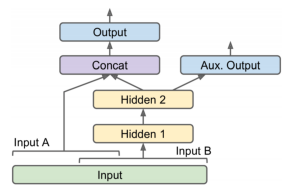

In [17]:
auxiliary_output_img = Image.open('img/auxiliary_output.png')
plt.figure(figsize=(5, 5))
plt.imshow(auxiliary_output_img)
plt.grid(False)
plt.axis('off');

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
# -------- input layer --------
input_layer_A = keras.Input(shape=[5])
input_layer_B = keras.Input(shape=[6])

# -------- deep layers --------
hidden_0 = keras.layers.Dense(30, activation='relu')(input_layer_B)
hidden_1 = keras.layers.Dense(30, activation='relu')(hidden_0)

# -------- concatination layer --------
concat = keras.layers.concatenate([input_layer_A, hidden_1])

# -------- output layer --------
output_layer = keras.layers.Dense(1, name="output")(concat)
auxiliary_output = keras.layers.Dense(1)(hidden_1)

# -------- model building --------
model = keras.models.Model(inputs=[input_layer_A, input_layer_B], outputs=[output_layer, auxiliary_output])

In [23]:
model.compile(optimizer='sgd', loss=['mse', 'mse'], loss_weights=[0.9, 0.1])
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_val_A, X_val_B], [y_val, y_val]))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8602 - output_loss: 0.7458 - dense_12_loss: 1.8896 - val_loss: 5.9673 - val_output_loss: 6.3359 - val_dense_12_loss: 2.6497
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5735 - output_loss: 0.5210 - dense_12_loss: 1.0468 - val_loss: 1.4686 - val_output_loss: 1.3948 - val_dense_12_loss: 2.1335
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5078 - output_loss: 0.4649 - dense_12_loss: 0.8936 - val_loss: 1.8642 - val_output_loss: 1.9598 - val_dense_12_loss: 1.0037
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4621 - output_loss: 0.4277 - dense_12_loss: 0.7714 - val_loss: 0.4491 - val_output_loss: 0.4083 - val_dense_12_loss: 0.8161
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4418 - output_loss: 0.4131 - dense_12_loss: 0.6998 - val_loss: 0.4052 - val_output_loss: 0.3769 - val_dense_12_loss: 0.6595


In [28]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print()

print(' STATS '.center(21, '='))
print(f'total loss:\t{total_loss:.3f}')
print(f'main loss:\t{main_loss:.3f}')
print(f'aux loss:\t{aux_loss:.3f}')
print(''.center(21, '='))

162/162 [==============================] - 0s 3ms/step - loss: 0.3606 - output_loss: 0.3477 - dense_12_loss: 0.4762

======= STATS =======
total loss:	0.361
main loss:	0.348
aux loss:	0.476


In [0]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [30]:
y_pred_main

array([[0.3618695],
       [1.5316448],
       [3.5083222]], dtype=float32)

In [31]:
y_pred_aux

array([[0.7439421],
       [1.7789698],
       [3.0890322]], dtype=float32)